## Problem 5
Community Finding and Genre Tagging

In [2]:
library(igraph)
library(data.table)


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



In [2]:
df = fread(file="movie_edgelist.txt")

Read 41030666 rows and 3 (of 3) columns from 1.769 GB file in 00:00:16


In [3]:
colnames(df) = c("n1", "n2", "weight")

In [3]:
g= readRDS("graph.rds")
# g = simplify( graph.data.frame(df, directed=FALSE))

In [24]:
names = V(g)$name

In [12]:
head(V(g))

+ 6/90829 vertices, named:
[1] TheLuckofaSailor            TheGreatBarrier            
[3] Labellasociet               Clubdeseoritas             
[5] RomeExpress                 ZombieApocalypse:Redemption

In [13]:
vcount(g)

[1] 90829

In [14]:
ecount(g)

[1] 40939838

In [4]:
community = readRDS("community.rds")
# this took 10 hrs
# community = fastgreedy.community(g)

In [16]:
modularity(community)

[1] 0.7500726

In [17]:
sizes(community)

Community sizes
    1     2     3     4     5     6     7     8     9    10    11    12    13 
 5725  1076 25963  4203  2856  3710  5083    33  3529  6607  8154   705 16185 
   14    15    16    17    18    19 
 1188  2356  1438   862   722   434 

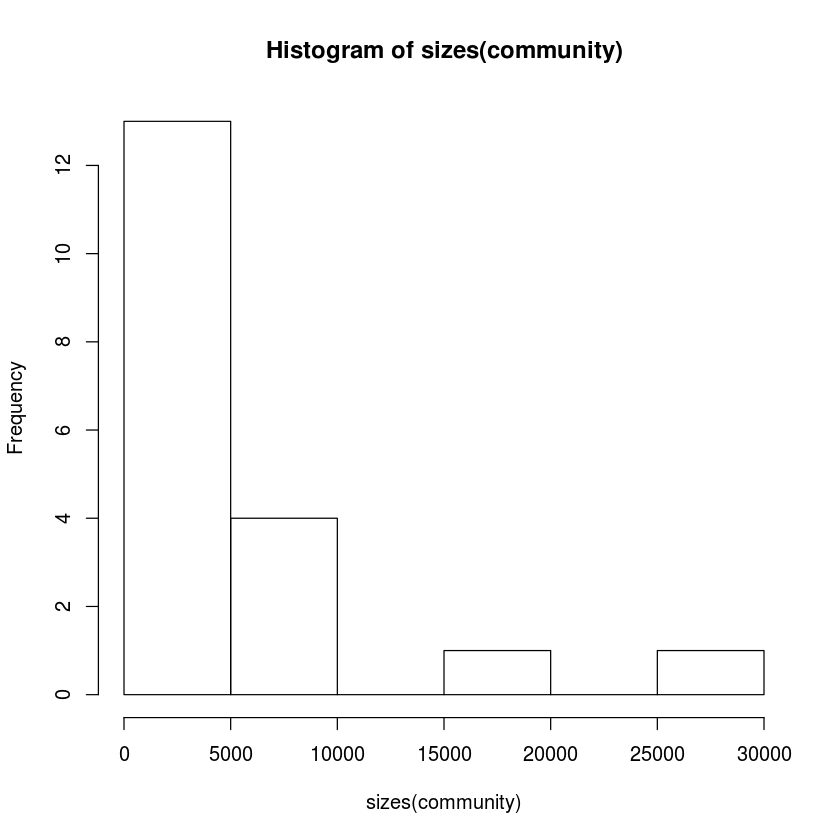

In [18]:
hist(sizes(community))

In [20]:
# saveRDS(g, "graph.rds")
# saveRDS(community, "community.rds")

### Load movie genres
Load genres for each movies

In [20]:
movie_genres = fread(file="clean_movie_genre.txt", header=FALSE, sep='\t')

In [21]:
head(movie_genres)

V1,V2
TheLuckofaSailor,Romance
LendMeYourWife,Short
FahrendesVolk,Short
BigBusiness,Comedy
MatineeIdol,Mystery
AlmostaHoneymoon,Comedy


In [22]:
setkey(movie_genres, V1)

In [25]:
V(g)$genre = movie_genres[names, ]$V2

In [27]:
head(V(g)$genre)

[1] "Romance" "Short"   "Drama"   "Music"   "Crime"   "Horror"

### Tag community id and compute the 

In [28]:
V(g)$community.id = community$membership

In [34]:
V(g)$community.desc = rep(NA, vcount(g))

In [46]:
for (comm in unique(V(g)$community.id)) {
    vs = which(V(g)$community.id == comm)
    genres = V(g)$genre[vs]
    ugenres = unique(genres)
    frequency = table(genres)
    gthan = ugenres[ sapply(ugenres, function(x){ frequency[x] / sum(frequency) > 0.2}) ]
    desc = do.call(paste, c(as.list(gthan), sep=",", collapse=""))
    V(g)$community.desc[vs] = rep(desc, length( vs ))
    print(desc)
}

[1] "Drama,undefined"
[1] "Short"
[1] "Drama,Comedy"
[1] "Drama"
[1] "Comedy,Drama"
[1] "NA"
[1] "Drama"
[1] "Comedy,Drama"
[1] "Drama"
[1] "Drama"
[1] "Comedy,Drama"
[1] "Drama"
[1] "Comedy,Drama"
[1] "Comedy,Drama"
[1] "Drama"
[1] "Comedy,Drama"
[1] "Drama,Romance"
[1] "Short"
[1] "Drama,Romance,Comedy"


In [41]:
saveRDS(g, "graph.rds")

## Problem 6

Experiment on test dataset

In [5]:
# ge nearest neighbor, sorted by weight
get_nearest_neighbor = function(v) {
    ns = neighbors(g, v)
    ws = sapply(ns, function(x){ edge_attr(g, "weight", get.edge.ids(g, c(v, x))) })
    return( ns[ order(ws, decreasing = TRUE) ] )
}

In [6]:
ns = get_nearest_neighbor(which(V(g)$name == "BatmanvSuperman:DawnofJustice"))
data.table(name = V(g)$name[ns], genre = V(g)$genre, community = V(g)$community.id[ns])[1 : 10, ]

Warning message in data.table(name = V(g)$name[ns], genre = V(g)$genre, community = V(g)$community.id[ns]):
“Item 1 is of size 829 but maximum size is 90829 (recycled leaving remainder of 468 items)”Warning message in data.table(name = V(g)$name[ns], genre = V(g)$genre, community = V(g)$community.id[ns]):
“Item 3 is of size 829 but maximum size is 90829 (recycled leaving remainder of 468 items)”

name,genre,community
Eloise,Romance,3
IntotheStorm,Short,3
ManofSteel,Drama,3
LoveandHonor,Music,3
RealSteel,Crime,3
RathertobeChosen,Horror,3
SalvationBoulevard,History,3
Demoted,Drama,3
JimmyP.,Family,3
Scream4,Adventure,3


In [7]:
ns = get_nearest_neighbor(which(V(g)$name == "Mission:Impossible-RogueNation"))
data.table(name = V(g)$name[ns], genre = V(g)$genre, community = V(g)$community.id[ns])[1 : 10, ]

Warning message in data.table(name = V(g)$name[ns], genre = V(g)$genre, community = V(g)$community.id[ns]):
“Item 1 is of size 697 but maximum size is 90829 (recycled leaving remainder of 219 items)”Warning message in data.table(name = V(g)$name[ns], genre = V(g)$genre, community = V(g)$community.id[ns]):
“Item 3 is of size 697 but maximum size is 90829 (recycled leaving remainder of 219 items)”

name,genre,community
Fan,Romance,1
Suffragette,Short,3
BreakingtheBank,Drama,3
NowYouSeeMe:TheSecondAct,Music,3
Phantom,Crime,7
TheRiseoftheKrays,Horror,3
TheTheoryofEverything,History,3
Avengers:AgeofUltron,Drama,3
TheManfromU.N.C.L.E.,Family,3
PatientZero,Adventure,3


In [8]:
ns = get_nearest_neighbor(which(V(g)$name == "Minions"))
data.table(name = V(g)$name[ns], genre = V(g)$genre, community = V(g)$community.id[ns])[1 : 10, ]

Warning message in data.table(name = V(g)$name[ns], genre = V(g)$genre, community = V(g)$community.id[ns]):
“Item 1 is of size 647 but maximum size is 90829 (recycled leaving remainder of 249 items)”Warning message in data.table(name = V(g)$name[ns], genre = V(g)$genre, community = V(g)$community.id[ns]):
“Item 3 is of size 647 but maximum size is 90829 (recycled leaving remainder of 249 items)”

name,genre,community
TheLorax,Romance,3
SurfsUp,Short,3
DespicableMe2,Drama,3
Up,Music,3
HortonHearsaWho!,Crime,3
GakenouenoPonyo,Horror,3
WALLE,History,3
IceAge:TheMeltdown,Drama,3
ToyStory3,Family,3
HappilyNEverAfter,Adventure,3


## Problem 7
Predict three movie's rating

In [9]:
movie_ratings = fread(file="clean_movie_rating.txt", header=FALSE, sep='\t')

In [10]:
setkey(movie_ratings, V1)

In [11]:
V(g)$rating = movie_ratings[V(g)$name, ]$V2
# some movie does not have ratings

In [12]:
example_movies = c(
    "BatmanvSuperman:DawnofJustice",
    "Mission:Impossible-RogueNation",
    "Minions"
)

In [13]:
# get example movies' id
example_ids = sapply(example_movies, function(x){ which( V(g)$name == x) })

In [14]:
get_nearest_neighbor_average_rating = function(vid, count) {
    ns = get_nearest_neighbor(vid)
    ratings = ns[1:count]$rating
    mean(ratings, na.rm=TRUE)
}

In [15]:
get_community_average_rating = function(vid) {
    comm.id = V(g)[vid]$community.id
    vs = which(V(g)$community.id == comm.id)
    rating = V(g)$rating[vs]
    mean(rating, na.rm=TRUE)
}

In [16]:
actual_ratings = c(6.7, 7.4, 6.4)

In [17]:
neighbor_ratings = sapply(example_ids, function(x) {get_nearest_neighbor_average_rating(x, 10)})

In [18]:
community_ratings = sapply(example_ids, get_community_average_rating)

In [103]:
neighbor_ratings

BatmanvSuperman:DawnofJustice Mission:Impossible-RogueNation 
                      6.377778                       7.285714 
                       Minions 
                      7.040000

In [105]:
community_ratings

BatmanvSuperman:DawnofJustice Mission:Impossible-RogueNation 
                      6.209354                       6.209354 
                       Minions 
                      6.209354

In [19]:
predict_rating = function(vid) {
    n_rating = get_nearest_neighbor_average_rating(vid, 10)
    comm_rating = get_community_average_rating(vid)
    0.7*n_rating + 0.3*comm_rating
}

In [20]:
predicted_rating = sapply(example_ids, predict_rating)

In [22]:
predicted_rating

BatmanvSuperman:DawnofJustice Mission:Impossible-RogueNation 
                      6.327251                       6.962806 
                       Minions 
                      6.790806